In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import root

 # Params(you can adjust them)

In [2]:
T = 2
Delta_T = 0.25
P = 1/ (1 + 0.005 + np.random.uniform(0,1,40)/200).cumprod()

 # Equity Duration

In [3]:
def Duration_Equity(Asset, Debt , Du_A, Du_D) :
    Equity = Asset-Debt
    print('Du_E = ' +str(Asset)+ '/'+str(Equity) +' * ' +str(Du_A)+
          ' - '+str(Debt)+ '/'+str(Equity) +'*'+str(Du_D))
    Du_E = Asset/Equity * Du_A - Debt/Equity *Du_D
    return Du_E

In [4]:
Duration_Equity(100,85,3,0.5)

Du_E = 100/15 * 3 - 85/15*0.5


17.166666666666668

 # Forward Rate Lecture

In [5]:
def Forward_rate(P,T,Delta_T) : 
    n = int(T/Delta_T)
    r0 = (1/np.array(P[0])-1)*1/Delta_T
    F_rte = np.concatenate([[r0],1/Delta_T * (np.array(P[:n-1])/(np.array(P[1:n]))-1)])
    return F_rte

In [6]:
def Forward_rate_credit(P,T,Delta_T, lamb) :
    n = int(T/Delta_T)
    df = np.concatenate([[1],P])
    return ((df * np.exp(lamb * Delta_T))[:n]/ df[1:n+1] - 1)/Delta_T

In [7]:
F_rate = Forward_rate([0.99, 0.98, 0.97, 0.96,0.95,0.94,0.93,0.92,0.91],2,0.25)
F_rate

array([0.04040404, 0.04081633, 0.04123711, 0.04166667, 0.04210526,
       0.04255319, 0.04301075, 0.04347826])

In [8]:
F_rate = Forward_rate(P,2,0.25)
F_rate

array([0.02362886, 0.02380294, 0.03878519, 0.03871763, 0.0280449 ,
       0.0387153 , 0.03893303, 0.03124691])

In [9]:
F_rate_credit = Forward_rate_credit(P,2,Delta_T, 0.005)
F_rate_credit

array([0.02866154, 0.02883583, 0.04383683, 0.04376919, 0.0330831 ,
       0.04376685, 0.04398486, 0.03628912])

 # IRS

In [10]:
def IRS(P,T, Delta_T) :
    n = int(T/Delta_T)
    a = 1-P[n-1]
    b = 0
    prin = '(' #formula string
    for i in P[:n] :
        b += Delta_T * i
        prin +=( '[' + str(Delta_T)+'*'+ str(np.round(i,4) )+']+' )

    print('             '+str(np.round(a,4))+'       \n'+'s =  '+'-----------------------------------'*min((int(T)+1), 3)+'\n      '+prin+ ')')
    return np.round(a/b, 5)

In [11]:
s = IRS(P,3,Delta_T)
s

             0.0872       
s =  ---------------------------------------------------------------------------------------------------------
      ([0.25*0.9941]+[0.25*0.9882]+[0.25*0.9788]+[0.25*0.9694]+[0.25*0.9626]+[0.25*0.9534]+[0.25*0.9442]+[0.25*0.9369]+[0.25*0.9308]+[0.25*0.9259]+[0.25*0.9188]+[0.25*0.9128]+)


0.03054

 # IRS credit

In [12]:
def IRS_when_credit(P,T,Delta_T, lamb) :
    a = 0
    prin_a = '       '
    n = int(T/Delta_T)
    DF = P[:n]
    DF_ = ([1] + list(DF))[:n]
    for i, ii in zip(DF_, DF) :
        a += i * np.exp(lamb*Delta_T) - ii 
        prin_a += '[' +str(np.round(i,3) ) + 'e^('+'lamb'+'*'+'dt' +')-'+ str(np.round(ii,3) ) + ']+'
    prin_a += ']'

    b = 0
    prin = '        '
    for i in P[:n] :
        b += Delta_T * i
        prin +=('[dt'+'*'+ str(np.round(i,3) )+']+' )
    print(prin_a + '\n' + 'S    =  ------------------------------------------------------------------------------------\n'+prin)
    return a/b

def IRS_when_credit2(P,T,Delta_T, F_rate) :
    a = 0
    n = int(T/Delta_T)
    prin_a = '      '
    F = list(F_rate)[:n]
    DF = P[:n]
    for i , ii in zip(F,DF):
        a += Delta_T * i * ii
        prin_a += '[dt' + '*' + str(np.round(i,3) ) + '*'+str(np.round(ii,3) ) + ']+'
    prin_a += ''
    print(prin_a)
    print()
    print('s   =     '+'---------------------------------------------------------------------------------')
    print()
    b = 0
    prin = '        '
    for i in P[:n] :
        b += Delta_T * i
        prin +=('[dt'+'*'+ str(np.round(i,3) )+']+' )
    print(prin)
    return a/b


In [13]:
def Old_Swap_Value(S_new, S_old, T, Delta_T, P, Duration_result =False) :
    n = int(T/Delta_T)
    print('(S_new - S_old) * sum( Delta_T * P) * 1 or -1 (Fixed_Payer = 1)' )
    if Duration_result ==False :
        return (S_new - S_old) * (np.array(P[:n]) * Delta_T).sum()
    else : 
        return (S_new - S_old) * (np.array(P[:n]) * Delta_T).sum(), (np.array(P[:n]) * Delta_T).sum()

In [14]:
IRS_credit_lamb = IRS_when_credit(P,2,Delta_T, lamb = 0.005)
IRS_credit_lamb

       [1e^(lamb*dt)-0.994]+[0.994e^(lamb*dt)-0.988]+[0.988e^(lamb*dt)-0.979]+[0.979e^(lamb*dt)-0.969]+[0.969e^(lamb*dt)-0.963]+[0.963e^(lamb*dt)-0.953]+[0.953e^(lamb*dt)-0.944]+[0.944e^(lamb*dt)-0.937]+]
S    =  ------------------------------------------------------------------------------------
        [dt*0.994]+[dt*0.988]+[dt*0.979]+[dt*0.969]+[dt*0.963]+[dt*0.953]+[dt*0.944]+[dt*0.937]+


0.03771249302568779

In [15]:
IRS_when_credit2(P,T,Delta_T, F_rate_credit)

      [dt*0.029*0.994]+[dt*0.029*0.988]+[dt*0.044*0.979]+[dt*0.044*0.969]+[dt*0.033*0.963]+[dt*0.044*0.953]+[dt*0.044*0.944]+[dt*0.036*0.937]+

s   =     ---------------------------------------------------------------------------------

        [dt*0.994]+[dt*0.988]+[dt*0.979]+[dt*0.969]+[dt*0.963]+[dt*0.953]+[dt*0.944]+[dt*0.937]+


0.037712493025687764

 # Caplet, Floorlet Pricing

In [16]:
def Caplet_Pricing(P,T,X,sigma,tenor, Delta_T_DF) :
    F = (P[int(T/Delta_T_DF)-1]/P[int(T/Delta_T_DF) + int(tenor/Delta_T_DF)-1] - 1) * 1/tenor
    P0 = P[int(T/Delta_T_DF) + int(tenor/Delta_T_DF)-1]
    d1 = (np.log(F/X) + 0.5 * sigma**2 * T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    Nd1 = norm.cdf(d1)
    Nd2 = norm.cdf(d2)

    print(' F = '+ str(np.round(F,5)) +'\n'+'d1    =    ' + str(np.round(d1,4) ) + '\n')
    print('dT * P0 * (F N(d1) - X N(d2)) \n='+str(tenor)+'*'+str(np.round(P0,4))+'*('+str(np.round(F,4))+'*'+str(np.round(Nd1,4))+' - '+str(X)+'*'+str(np.round(Nd2,4))+')')
    return np.round( tenor * P0 * (F * Nd1 - X * Nd2)  , 6)

def Floorlet_Pricing(P,T,X,sigma,tenor, Delta_T_DF) :
    F = (P[int(T/Delta_T_DF)-1]/P[int(T/Delta_T_DF) + int(tenor/Delta_T_DF)-1] - 1) * 1/tenor
    P0 = P[int(T/Delta_T_DF) + int(tenor/Delta_T_DF)-1]
    d1 = (np.log(F/X) + 0.5 * sigma**2 * T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    Nd1 = norm.cdf(d1)
    Nd2 = norm.cdf(d2)
    print(' F = ', np.round(F,5) ,'\n')
    print('d1    =    ' + str(np.round(d1,4) ) + '\n')
    print(tenor,'*',np.round(P0,4),'*(',np.round(X,4),'*',np.round( 1 - Nd2,4),' - ',np.round(F,4),'*',np.round( 1 - Nd1,4),')')
    return np.round(tenor * P0 * (X * (1-Nd2) - F * (1-Nd1)), 6)

In [17]:
Caplet_Pricing([0.992063,0.983215,0.972998,0.962412],T = 1,X = 0.03, sigma = 0.35, tenor = 0.5,Delta_T_DF = 0.5)


 F = 0.021
d1    =    -0.8439

dT * P0 * (F N(d1) - X N(d2)) 
=0.5*0.973*(0.021*0.1994 - 0.03*0.1163)


0.00034

In [18]:
Floorlet_Pricing([0.992063,0.983215,0.972998,0.962412],T = 1,X = 0.03, sigma = 0.35, tenor = 0.5,Delta_T_DF = 0.5)

 F =  0.021 

d1    =    -0.8439

0.5 * 0.973 *( 0.03 * 0.8837  -  0.021 * 0.8006 )


0.004718

 # Forward Swap Rate, Swaption

In [19]:
def Forward_Swap_Rate(P, t0,tenor,Delta_T_DF,Delta_T_Swap ) : 
    P_t0 = P[int(t0/Delta_T_DF)-1]
    P_tm = P[int( (t0+tenor)/Delta_T_DF )-1]
    a = P_t0 - P_tm
    b = (Delta_T_Swap * np.array(P[int(t0/Delta_T_DF) : int( (t0+tenor)/Delta_T_DF ):int(Delta_T_Swap / Delta_T_DF)])).sum()
    return a/b

In [20]:
Forward_Swap_Rate([0.992063,0.983215,0.972998,0.962412,0.951], t0= 0.5,tenor= 2,Delta_T_DF= 0.5,Delta_T_Swap= 0.5)

0.02122324514649356

In [21]:
def swaption(P,X,sigma, t0= 2,tenor= 2,Delta_T_DF= 0.25,Delta_T_Swap= 0.5 ) :
    FSR = Forward_Swap_Rate(P, t0,tenor,Delta_T_DF,Delta_T_Swap)
    d1 = (np.log(FSR/X) + 0.5 * sigma**2 * t0)/(sigma*np.sqrt(t0))
    d2 = d1-sigma*np.sqrt(t0)
    Nd1 = norm.cdf(d1)
    Nd2 = norm.cdf(d2)
    
    V = FSR * Nd1 - X * Nd2
    mult = (P[int(t0/Delta_T_DF) : int( (t0+tenor) /Delta_T_DF ) : int(Delta_T_Swap/Delta_T_DF)] * Delta_T_Swap).sum()
    print('Forward Swap Rate = ',np.round(FSR,4),'\n swaptionvalue_per_year = ',np.round(V,6),'\nDiscount Multiple = ',np.round(mult,4) )

    return V*mult
    

In [22]:
swaption(np.array([0.992063, 0.983215, 0.972998, 0.962412, 0.951]),X = 0.02,
         sigma = 0.07, t0= 0.5,tenor= 2,Delta_T_DF= 0.5,Delta_T_Swap= 0.5 )

Forward Swap Rate =  0.0212 
 swaptionvalue_per_year =  0.001281 
Discount Multiple =  1.9348


0.002477569028927858

In [23]:
def zero_bond(P,T,Delta_T, lamb = 0.0008, RR = 0) :
    if RR == 0 :
        Mat = int(T/Delta_T)
        surv = np.exp(-lamb * T)
        price_zeroR = P[Mat-1] * surv
        print('survP = '+str(surv) +'  ,  price_zeroR = '+ str(np.round(price_zeroR,4) ))
        return price_zeroR
    else :
        Mat = int(T/Delta_T)
        surv = np.exp(-lamb * T)
        price_zeroR = P[Mat-1] * surv
        
        Q = np.exp(-lamb * np.arange(Delta_T, T+Delta_T, Delta_T))
        dQ_ = np.concatenate([[1],Q])[:-1] - np.concatenate([[1],Q])[1:]
        Z = P[:len(dQ_)]
        DV = RR * (dQ_ * Z).sum()
        print('survP = '+str(surv) +'  ,  price_bond = '+ str(np.round(price_zeroR,4) ) + '+' +str(np.round(DV,4) ))
        return price_zeroR + DV
        

In [24]:
zero_bond(np.array([0.99453009,0.987616219,0.980385465,0.972483223]),
          0.5,0.5,0.01,0.8)

survP = 0.9950124791926823  ,  price_bond = 0.9896+0.004


0.9935380420965243

In [25]:
def Coupon_Bond(P,T,c,Delta_T_DF,Delta_T_C,lamb,RR,F=100) :
    Coupon_sum = 0
    for i in np.arange(Delta_T_C, T+Delta_T_C, Delta_T_C) :
        Coupon_sum += (F * c * Delta_T_C *
                       zero_bond(P,i, Delta_T = Delta_T_DF, lamb = lamb , RR = RR))
    PV_principal = F * zero_bond(P,T,Delta_T = Delta_T_DF, lamb = lamb , RR = RR)
    return Coupon_sum + PV_principal
    

In [26]:
Coupon_Bond(P,3,0.032,Delta_T_DF = Delta_T,Delta_T_C = 0.5,
            lamb = 0.008,RR = 0.4,F=100)

survP = 0.9960079893439915  ,  price_bond = 0.9843+0.0016
survP = 0.9920319148370607  ,  price_bond = 0.9616+0.0031
survP = 0.9880717128619305  ,  price_bond = 0.942+0.0046
survP = 0.9841273200552851  ,  price_bond = 0.922+0.0061
survP = 0.9801986733067553  ,  price_bond = 0.9076+0.0076
survP = 0.9762857097579093  ,  price_bond = 0.8912+0.009
survP = 0.9762857097579093  ,  price_bond = 0.8912+0.009


99.04809836719332

In [27]:
def Optimize_Merton(F,r,T,sigma_E,E_market) :
    
    def EandsigmaE(x,F) :
        sig_A = x[0]
        A = x[1]
        d1 = (np.log(A/F) + (r + 0.5 * sig_A**2)*T)/(sig_A * np.sqrt(T))
        d2 = d1 - sig_A * np.sqrt(T)
        Nd1 = norm.cdf(d1)
        Nd2 = norm.cdf(d2)
        E = A * Nd1 - F * np.exp(-r * T) * Nd2 # r = 0.032, T = 2
        sig_E = A/E * Nd1 * sig_A
        return np.array([sig_E,E])
    def fun(x,F,ans) :
        return EandsigmaE(x,F) - ans

    x0 = np.array([0.3, 10000])
    ret = root(fun, x0, args = (F, np.array([sigma_E,E_market]) ) )
    return np.round(ret.x[0],4) , np.round(ret.x[1],4)

def Merton_Equity_Value(A,sig_A,r,T,F, sig_E_result = False) :
    d1 = (np.log(A/F) + (r + 0.5 * sig_A**2)*T)/(sig_A * np.sqrt(T))
    d2 = d1 - sig_A * np.sqrt(T)
    Nd1 = norm.cdf(d1)
    Nd2 = norm.cdf(d2)
    E = A * Nd1 - F * np.exp(-r * T) * Nd2 # r = 0.032, T = 2

    if sig_E_result == False :
        return np.round(E,4)
    else :
        sig_E = A/E * Nd1 * sig_A
        return np.round(E,4), np.round(sig_E,4)
    
def Merton_Debt_Value(A,sig_A,r,T,F) :
    d1 = (np.log(A/F) + (r + 0.5 * sig_A**2)*T)/(sig_A * np.sqrt(T))
    d2 = d1 - sig_A * np.sqrt(T)
    Nd1 = norm.cdf(d1)
    Nd2 = norm.cdf(d2)
    E = A * Nd1 - F * np.exp(-r * T) * Nd2 # r = 0.032, T = 2
    D = A-E
    return np.round(D,4)

def Merton_Credit_Spread(A,sig_A,r,T,F) :
    d1 = (np.log(A/F) + (r + 0.5 * sig_A**2)*T)/(sig_A * np.sqrt(T))
    d2 = d1 - sig_A * np.sqrt(T)
    Nd1 = norm.cdf(d1)
    Nd2 = norm.cdf(d2)
    E = A * Nd1 - F * np.exp(-r * T) * Nd2 # r = 0.032, T = 2
    D = A-E
    Y = 1/T * np.log(F/D)
    print(str(np.round(Y-r,4) )+' = '+str(np.round(Y,4) )+' - '+str(r))
    return np.round(Y-r,4)



In [28]:
Optimize_Merton(F = 3800,r = 0.023, T = 5,sigma_E = 0.4,E_market = 5000)

(0.2473, 8324.8304)

In [29]:
Merton_Equity_Value(A = 14090 , sig_A = 0.28, r = 0.032, T = 2, F = 7862, sig_E_result= True)

(6800.5015, 0.5608)

In [30]:
Merton_Debt_Value(A = 14090,sig_A = 0.28, r = 0.032, T = 2, F = 7862)

7289.4985

In [31]:
Merton_Credit_Spread(A = 8798,sig_A = 0.227, r = 0.011, T = 0.5, F = 3800)

0.0 = 0.011 - 0.011


0.0

In [32]:
Cum_PD = np.array([0.016477, 0.032682, 0.04862 , 0.064296, 0.079713, 
                   0.094876, 0.11   , 0.13  , 0.145 , 0.16, 0.19])

In [33]:
def CDS_pricing(Cum_PD,P,T,Delta_T_CDS,Delta_T_DF, RR) :
    Cum_PD = np.array(Cum_PD)
    Suv_P = 1-Cum_PD
    start = int(Delta_T_CDS/Delta_T_DF)-1
    step = int(Delta_T_CDS/Delta_T_DF)
    end = int(T/Delta_T_DF)
    DF = P[start:end:step]
    Q = np.concatenate([[1],Suv_P])[:int(T/Delta_T_CDS)+1]
    dQ_ = (Q[:-1] - Q[1:])[:int(T/Delta_T_CDS)]
    a = (DF * dQ_).sum()
    b = (np.concatenate([[1],DF])[:int(T/Delta_T_CDS)]*
         np.concatenate([[1],Suv_P])[:int(T/Delta_T_CDS)] ).sum()
    Discount = np.concatenate([[1],DF])
    print('Discount',Discount.round(4))
    print()
    print('Q       ',Q.round(4))
    return a/b * (1-RR)

In [34]:
def PV_of_CDS_premium(s,Q, P,T,Delta_T_CDS, Delta_T_DF) :
    Q = Q[:int(T/Delta_T_CDS)]
    PV = P[int(Delta_T_CDS/Delta_T_DF)-1:int(T/Delta_T_DF):int(Delta_T_CDS/Delta_T_DF)]
    a = np.concatenate([[1], np.array(Q)])[:int(T/Delta_T_CDS)]
    b = np.concatenate([[1], PV])[:int(T/Delta_T_CDS)]
    print('s * sum(Q(0,i-1) * PV(i-1))')
    return np.round(s * (a*b).sum() , 5)

def PV_of_Protection_payout(P,T,Q,Delta_T_CDS, Delta_T_DF, RR = 0.4) :
    dQ_ = (np.concatenate([[1],Q])[:-1] - np.concatenate([[1],Q])[1:])[:int(T/Delta_T_CDS)]
    start = int(Delta_T_CDS/Delta_T_DF)-1
    step = int(Delta_T_CDS/Delta_T_DF)
    end = int(T/Delta_T_DF)
    DF = P[start:end:step]
    A = np.round((DF * dQ_).sum() * (1-RR), 5)
    return A


In [35]:
CDS_pricing([0.0574,0.126,0.189],
            [0.99453009,0.98761622,0.98034,0.97248],
            T= 1.5, Delta_T_CDS = 0.5, Delta_T_DF= 0.5, RR = 0)

Discount [1.     0.9945 0.9876 0.9803]

Q        [1.     0.9426 0.874  0.811 ]


0.06662734582897022

In [36]:
def Portfolio_default(PD, beta, maximum_theta = 1) :
    x = np.arange(0.001,maximum_theta,0.001)
    C = norm.ppf(PD)
    return pd.DataFrame(norm.cdf( - (C-norm.ppf(x) * np.sqrt(1-beta**2))/beta  ) , index = x, columns = ['P(L<theta)'])

def Portfolio_Loss(PD, beta, RR, maximum_theta = 1) :
    x = np.arange(0.001,maximum_theta,0.001)
    Loss_rate = 1-RR
    C = norm.ppf(PD)
    return pd.DataFrame(norm.cdf( - (C-norm.ppf( x / Loss_rate ) * np.sqrt(1-beta**2))/beta  ) , index = x, columns = ['P(Loss)'])

def Portfolio_Loss2(PD, beta,RR, theta) :
    C = norm.ppf(PD)
    Loss_rate = 1-RR
    return norm.cdf( - (C-norm.ppf(theta / Loss_rate) * np.sqrt(1-beta**2))/beta  ) 

In [52]:
beta = np.sqrt(0.35)
Portfolio_Loss(0.024,beta,maximum_theta = 0.25, RR = 0.4).iloc[9::15]

,P(Loss)
0.010,0.670873
0.025,0.837074
0.040,0.902637
0.055,0.936882
0.070,0.957119
0.085,0.969966
0.100,0.978514
0.115,0.984393
0.130,0.988536
0.145,0.991510


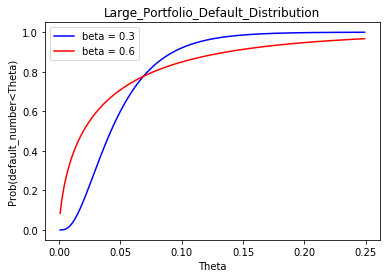

In [38]:
beta1 = 0.3
beta2 = 0.6
plt.plot(Portfolio_default(0.05,beta1,maximum_theta = 0.25), label = 'beta = '+str(beta1), color = 'blue')
plt.plot(Portfolio_default(0.05,beta2,maximum_theta = 0.25), label = 'beta = '+str(beta2), color = 'red')
plt.title('Large_Portfolio_Default_Distribution')
plt.xlabel('Theta')
plt.ylabel('Prob(default_number<Theta)')
plt.legend(loc = 'best')
plt.show()

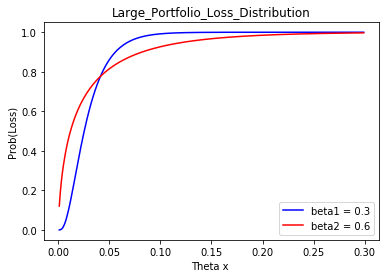

In [39]:
plt.title('Large_Portfolio_Loss_Distribution')
plt.plot(Portfolio_Loss(0.05,beta1,RR = 0.4, maximum_theta = 0.3),
         label = 'beta1 = '+str(beta1) , color = 'blue')
plt.plot(Portfolio_Loss(0.05,beta2,RR = 0.4, maximum_theta = 0.3),
         label = 'beta2 = '+str(beta2) , color = 'red')
plt.legend(loc = 'best')
plt.xlabel('Theta x ')
plt.ylabel('Prob(Loss)')
plt.show()

In [40]:
def CDO_Equity_Ratio(PD, target_PD, beta, RR) :
    Target_Surv = 1-target_PD
    def fun2(x,PD,beta,RR,ans) :
        return Portfolio_Loss2(PD,beta,RR,x) - ans

    x0 = 0.03
    ret0 = root(fun2 , x0, args = (PD,beta ,RR,Target_Surv))
    return ret0.x

In [41]:
CDO_Equity_Ratio(0.024, 0.0683, 0.35, 0.4)

array([0.03600501])

In [42]:
def Pricing_Treasury(C_rate, T, P, Delta_T_DF , Delta_T_Coupon,
                     Duration_ = False, Convexity = False) :
    start = int(Delta_T_Coupon/Delta_T_DF)-1
    step = int(Delta_T_Coupon/Delta_T_DF)
    end = int(T/Delta_T_DF)
    DF = P[start:end:step]
    PV = (DF * C_rate * Delta_T_Coupon).sum() + DF[-1]
    if Duration_ == False :
        return PV
    elif Duration_ == True : 
        w = np.arange(Delta_T_Coupon, T+Delta_T_Coupon, Delta_T_Coupon)
        Duration = 1/PV * (DF * C_rate * Delta_T_Coupon * w ).sum() + w[-1] * DF[-1]
        if Convexity == False :
            return PV, Duration
        else :
            w2 = w**2
            Conv = 1/PV * (DF * C_rate * Delta_T_Coupon * w2).sum() + w2[-1] * DF[-1]
            return PV, Duration, Conv
    
def IFRN(C_rate, P, T, Delta_T) :
    print('               IRS     \n')
    s = IRS(P, T, Delta_T = Delta_T)
    print()
    print(' OSV')
    OSV = Old_Swap_Value(C_rate, s, T, Delta_T, P)
    print()
    print('OSV = ', OSV)
    print()
    PV = P[int(T/Delta_T)-1]
    print('IFRN = ' + 'Old Swap Value + PV(0,T)')
    return OSV+PV
def IFRN_Duration(C_rate, C_Treasury, P, T, Delta_T) :
    P_Treasury, D = Pricing_Treasury(C_Treasury, T, P, Delta_T , Delta_T, True)
    P_IFRN = IFRN(C_rate, P, T, Delta_T)
    D_IFRN =  (2 * P_Treasury)/P_IFRN * D - 1/P_IFRN * Delta_T
    print('D_IFRN = 2x'+str(P_Treasury)+'/'+str(P_IFRN) +'x'+str(np.round(D,4) )+ ' - '+'1/'+str(P_IFRN) +'x'+str(Delta_T))
    return D_IFRN

def IFRN_Convexity(C_rate, C_Treasury, P, T, Delta_T) :
    P_Treasury, D , Con = Pricing_Treasury(C_Treasury, T, P, Delta_T ,
                                           Delta_T, True, True)
    P_IFRN = IFRN(C_rate, P, T, Delta_T)
    C_IFRN =  (2 * P_Treasury)/P_IFRN * Con - 1/P_IFRN * Delta_T**2
    print('C_IFRN = 2x'+str(P_Treasury)+'/'+str(P_IFRN) +'x'+str(np.round(Con,4) )+ ' - '+'1/'+str(P_IFRN) +'x'+str(Delta_T)+'^2')
    return C_IFRN



In [43]:
IFRN_Duration(C_rate = 0.08, C_Treasury = 0.04, P= P, T = 2, Delta_T= 0.5)

               IRS     

             0.0306       
s =  ---------------------------------------------------------------------------------------------------------
      ([0.5*0.9941]+[0.5*0.9882]+[0.5*0.9788]+[0.5*0.9694]+)

 OSV
(S_new - S_old) * sum( Delta_T * P) * 1 or -1 (Fixed_Payer = 1)

OSV =  0.1266015318252314

IFRN = Old Swap Value + PV(0,T)
D_IFRN = 2x1.0479834873103022/1.0959749403865542x2.0321 - 1/1.0959749403865542x0.5


3.430039167887034

In [44]:
IFRN_Convexity(C_rate = 0.08, C_Treasury = 0.04, P= P, T = 2, Delta_T= 0.5)

               IRS     

             0.0306       
s =  ---------------------------------------------------------------------------------------------------------
      ([0.5*0.9941]+[0.5*0.9882]+[0.5*0.9788]+[0.5*0.9694]+)

 OSV
(S_new - S_old) * sum( Delta_T * P) * 1 or -1 (Fixed_Payer = 1)

OSV =  0.1266015318252314

IFRN = Old Swap Value + PV(0,T)
C_IFRN = 2x1.0479834873103022/1.0959749403865542x4.0171 - 1/1.0959749403865542x0.5^2


7.454328800181053

In [45]:
Pricing_Treasury(0.04, 2, P, Delta_T_DF = 0.25, Delta_T_Coupon = 0.5 ,
                 Duration_ = True, Convexity= True)

(1.0138456457772242, 1.9678203413944138, 3.8877910759347847)

In [46]:
def PV_Strapping_with_CBond(B_lst, C_lst,Delta_T_Bond ) :
    Delta_T_Bond = 0.5
    PV = np.array([B_lst[0]/(1+Delta_T_Bond * C_lst[0])])
    for i in range(1,len(B_lst)) :
        new_PV = (B_lst[i] - C_lst[i] * Delta_T_Bond * PV.sum())/(1 + Delta_T_Bond * C_lst[i])
        PV = np.concatenate([PV, [new_PV] ])
    return PV

In [47]:
B_lst = [Pricing_Treasury(0.02, 0.5, P, 0.25, 0.5 , True, True)[0],
 Pricing_Treasury(0.02, 1, P, 0.25, 0.5 , True, True)[0],
 Pricing_Treasury(0.02, 1.5, P, 0.25, 0.5 , True, True)[0],
 Pricing_Treasury(0.02, 2, P, 0.25, 0.5 , True, True)[0],
 Pricing_Treasury(0.02, 2.5, P, 0.25, 0.5 , True, True)[0],
 Pricing_Treasury(0.02, 3, P, 0.25, 0.5 , True, True)[0]       ]
C_lst = [0.02,0.02,0.02,0.02,0.02,0.02]

In [48]:
PV_Strapping_with_CBond(B_lst, C_lst, 0.5)

array([0.98824668, 0.96937341, 0.95339648, 0.93688756, 0.92592103,
       0.91284843])

In [49]:
PV_Strapping_with_CBond([100,100,100,100], [0.04,0.042,0.044,0.048], 0.5)

array([98.03921569, 95.92671545, 93.67196626, 90.91473678])

In [50]:
def Annuity(C_annual, y, Delta_T, T, Duration_ = False , Convexity = False) : 
    w = np.arange(Delta_T, T+Delta_T, Delta_T)
    DF = 1/(1+y*Delta_T )**(w/Delta_T)
    if Duration_ == False :
        return (Delta_T*C_annual * DF).sum()
    else :
        Price = ( Delta_T*C_annual * DF).sum() 
        D = ((C_annual * Delta_T * DF * w)/Price).sum()
        if Convexity == False :
            return Price, D
        else :
            C = ((C_annual * Delta_T * DF * w**2)/Price).sum()
            return Price, D, C